## -1. Instructions:
* Run the cells below sequentially
* Click a cell to edit
* ** Shift-enter ** to run a cell

## 0. Import useful tools

In [1]:
# Be patient, this may take a little while
# If you see "In [*]" to the left of this cell, it means it is busy computing, just wait a bit longer
import os, imars3d, numpy as np

In [2]:
# Be patient, this may take a little while too
# %matplotlib notebook
%matplotlib inline
from matplotlib import pyplot as plt

## 1. Define data paths
** Modify these paths to suit your need **

In [ ]:
# use your experiment IPTS number
iptsdir = "/HFIR/CG1DImaging/IPTS-#####/"

In [3]:
# path to the directory with ct, ob, and df data files or subdirs
datadir = os.path.join(iptsdir,"raw/")

In [4]:
# temporary working directory. 
# !!! should be /SNSlocal2/<yourusername>/<experimentname> !!!
workdir = "/SNSlocal2/USERNAME/EXP"
# !rm -rf {workdir}
!mkdir -p {workdir}

In [5]:
# path to save output results (reconstructed slices)
outdir = os.path.join(iptsdir, "shared/processed_data/EXP")

## 2. Create CT data object

In [ ]:
# check CT scan data files.
# You will need to make sure the
# "CT_identifier" string you choose is correct.
# modify this line according to your data path
!ls {datadir}/ct_scans/Cracked_3/*Cracked_3_CT* | sed -n "1,6p"

In [ ]:
# check OB data files.
# You will need to make sure the
# "ob_identifier" string you choose is correct.
# modify this line according to your data path
!ls {datadir}/ob/*Cracked_3*

In [ ]:
# check DF data files
# You will need to make sure the
# "df_identifier" string you choose is correct.
# modify this line according to your data path
!ls {datadir}/df/*Cracked_2_DF*

In [11]:
# import the CT class
from imars3d.CT import CT

In [12]:
# ask for help
# CT?

In [13]:
# Once the filename patterns are confirmed, 
# you can create the ct object.
ct = CT(datadir, 
        CT_subdir="ct_scans/Cracked_3", CT_identifier="Cracked_3_CT", 
        workdir=workdir, outdir=outdir,
        ob_identifier="Cracked_3", df_identifier="Cracked_2_DF"
       )

Checking CT fn pattern  6%|##                                  | [ETA: 0:00:02] 

 * found OB pattern: /SNS/users/fc2/recon/18009.1/23+27/./*OB*
 * found DF pattern: /SNS/users/fc2/recon/18009.1/23+27/./*DF*


Checking CT fn pattern100%|###################################| [ETA:  0:00:00] 

 * found CT pattern: /SNS/users/fc2/recon/18009.1/23+27/./*CT*_%07.3f_*.*


## 3. Find region of interests

In [14]:
# compute an average image in order to obtain ROI
# it may take a minute
ave = ct.estimateAverage(ct.ct_series)

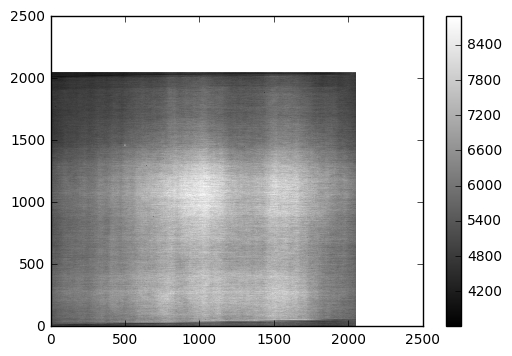

In [15]:
# plot the average image. it may take a few seconds
plt.pcolormesh(ave, cmap="gray")
plt.colorbar()

* If we can see sth here, we can define the ROI already
* Since we cannot see anything, we need to preprocess the data before moving on

### 3.1 Preprocess the data so that we can see better contrast

In [ ]:
ct.preprocess()

In [20]:
from imars3d.ImageFile import ImageFile

In [23]:
import glob

In [24]:
files = glob.glob("%s/intensity-fluctuation-correction/intfluctcorrected*.tiff" % workdir)

In [25]:
len(files)

1831

In [27]:
img = ImageFile(files[0]).data

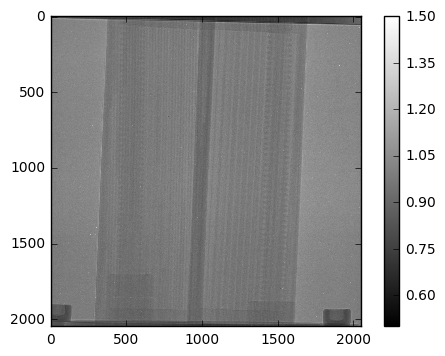

In [22]:
plt.imshow(img, cmap='gray')
plt.clim(0.5, 1.5)
plt.colorbar()

** Now we can set the crop window to 200,50, 1840,2000 **

## 4. Run reconstruction

In [ ]:
%%time
# Now bindly run the reconstruction to give it a try
ct.recon(crop_window=(200,50, 1840,2000))

** Check output **

In [ ]:
# recon output
!ls -l {outdir} |head -n 10

In [ ]:
# temporary results
!ls -tl {workdir}

In [ ]:
# for example: sinograms
!ls {workdir}/intensity-fluctuation-correction | head -n 10